# Scatter plots
### Using the observational region designed in proposal observtion ALMA


In [1]:
# Import the necessary libraries
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel, proj_plane_pixel_scales


### ------------------ define the parameters to use ------------------------------

In [140]:
# Write the parameter to using and change
file6 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_MOMENTUMS/ALMA_AREA/moment0_CII_5SIGMA_SPECIFIC_VALUE.fits'
file5 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_MOMENTUMS/ALMA_AREA/moment0_CII_4SIGMA_SPECIFIC_VALUE.fits'
file4 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_MOMENTUMS/ALMA_AREA/moment0_CII_3SIGMA_SPECIFIC_VALUE.fits'

#PBCOR MANUALLY
#file3 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBcor_dividiendolos/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_5SIGMA_PBCor.fits'
#file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBcor_dividiendolos/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_4SIGMA_PBCor.fits'
#file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBcor_dividiendolos/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_3SIGMA_PBCor.fits'

#PBCOR AUTOMATIC
file3 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBCor/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_5SIGMA_PBCor.fits'
file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBCor/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_4SIGMA_PBCor.fits'
file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_MOMENTUMS/PBCor/moment0_CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES_3SIGMA_PBCor.fits'


#TITLE = f'Emission at ALMA Obs. area'
name2 = r'$\log_{10}({\int{T_{mb}(C^+)} d\nu)}~ (K~ km s^{-1})$'
name1 = r'$\int{T_{R}(CF^+) d\nu}~ (K~ km s^{-1})$'

#-------------- Define the coordinates of the region of interest -------------------
# # Select the region to generate channel maps
# Define the center coordinates of the region to mask
coord = SkyCoord("05h39m36.675s", "-69d46m00.260s", frame='icrs') # Coordinates used in ALMA observations
#coord = SkyCoord('05h39m37.50s', '-69d45m35.00s', frame='icrs') # used on proposal APEX, NORTH
#coord = SkyCoord('05h39m37.8s', '-69d46m09.9s', frame='icrs')

# Define the size of the region to mask (in arcseconds)
# 90 X 110 USED IN alma region 
# 44 x 58 used in NORTH
# 60 X 37 USED IN SOUTH
width = 90 * u.arcsec
height = 110 * u.arcsec  # Width and height in arcseconds

highlight_coord = SkyCoord('05h39m37.8s', '-69d46m09.9s', frame='icrs')


### ------------------------- Define the function for normalize the intensities ------------------------------------

In [141]:
# Define the function to normalize the data

# La función de normalización es un placeholder. Puedes cambiarla cuando tengas la ecuación.
def normalize_data(data, normalizer):
    """Normalizes the data by dividing it by a given value."""
    # Asegúrate de no dividir por cero
    if normalizer == 0:
        return data
    return data / normalizer

n = 1

In [142]:
# Obtain the integrated intensity (basicly intensity at the position in the moment 0) in each position of cubes from files
with fits.open(file1, memmap=True) as hdu1:
    data1 = hdu1[0].data.squeeze()  # elimina ejes vacíos
    wcs1 = WCS(hdu1[0].header, naxis=2)

with fits.open(file2, memmap=True) as hdu2:
    data2 = hdu2[0].data.squeeze()
    wcs2 = WCS(hdu2[0].header, naxis=2)

with fits.open(file3, memmap=True) as hdu3:
    data3 = hdu3[0].data.squeeze()
    wcs3 = WCS(hdu3[0].header, naxis=2)
    
with fits.open(file4, memmap=True) as hdu4:
    data4 = hdu4[0].data.squeeze()
    wcs4 = WCS(hdu4[0].header, naxis=2)

with fits.open(file5, memmap=True) as hdu5:
    data5 = hdu5[0].data.squeeze()
    wcs5 = WCS(hdu5[0].header, naxis=2)
    
with fits.open(file6, memmap=True) as hdu6:
    data6 = hdu6[0].data.squeeze()
    wcs6 = WCS(hdu6[0].header, naxis=2)

print(wcs1)
print('-----------------------------------')
print(wcs2)
print('-----------------------------------')


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60
-----------------------------------
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60
-----------------------------------


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [143]:
# Generate the mask to select the designed region
# Convert world coordinates to pixel coordinates
x_center6, y_center6 = wcs6.world_to_pixel(coord)
x_center5, y_center5 = wcs5.world_to_pixel(coord)
x_center4, y_center4 = wcs4.world_to_pixel(coord)

x_center3, y_center3 = wcs3.world_to_pixel(coord)
x_center2, y_center2 = wcs2.world_to_pixel(coord)
x_center1, y_center1 = wcs1.world_to_pixel(coord)

# Calculate the width and height of the region in pixels
pixel_scale1 = np.abs(wcs1.pixel_scale_matrix[0, 0] * u.deg)
width_pixels1 = (width.to(u.deg) / pixel_scale1).value
height_pixels1 = (height.to(u.deg) / pixel_scale1).value

pixel_scale2 = np.abs(wcs2.pixel_scale_matrix[0, 0] * u.deg)
width_pixels2 = (width.to(u.deg) / pixel_scale2).value
height_pixels2 = (height.to(u.deg) / pixel_scale2).value

pixel_scale3 = np.abs(wcs3.pixel_scale_matrix[0, 0] * u.deg)
width_pixels3 = (width.to(u.deg) / pixel_scale3).value
height_pixels3 = (height.to(u.deg) / pixel_scale3).value

pixel_scale4 = np.abs(wcs4.pixel_scale_matrix[0, 0] * u.deg)
width_pixels4 = (width.to(u.deg) / pixel_scale4).value
height_pixels4 = (height.to(u.deg) / pixel_scale4).value

pixel_scale5 = np.abs(wcs5.pixel_scale_matrix[0, 0] * u.deg)
width_pixels5 = (width.to(u.deg) / pixel_scale5).value
height_pixels5 = (height.to(u.deg) / pixel_scale5).value

pixel_scale6 = np.abs(wcs6.pixel_scale_matrix[0, 0] * u.deg)
width_pixels6 = (width.to(u.deg) / pixel_scale6).value
height_pixels6 = (height.to(u.deg) / pixel_scale6).value

In [144]:
# Create the masks for each cube
# Note: The pixel coordinates might differ slightly between the two cubes
# due to different headers/WCS, so we calculate them separately.
def create_rectangular_mask(data, x_center, y_center, width_px, height_px):
    """Creates a boolean mask for a rectangular region in a 2D array."""
    ny, nx = data.shape
    x_min = int(np.floor(x_center - width_px / 2))
    x_max = int(np.ceil(x_center + width_px / 2))
    y_min = int(np.floor(y_center - height_px / 2))
    y_max = int(np.ceil(y_center + height_px / 2))

    mask = np.zeros_like(data, dtype=bool)
    # Ensure the bounds are within the data shape
    x_min = max(0, x_min)
    x_max = min(nx, x_max)
    y_min = max(0, y_min)
    y_max = min(ny, y_max)
    
    mask[y_min:y_max, x_min:x_max] = True
    return mask

mask1 = create_rectangular_mask(data1, x_center1, y_center1, width_pixels1, height_pixels1)
mask2 = create_rectangular_mask(data2, x_center2, y_center2, width_pixels2, height_pixels2)
mask3 = create_rectangular_mask(data3, x_center3, y_center3, width_pixels3, height_pixels3)

mask4 = create_rectangular_mask(data4, x_center4, y_center4, width_pixels4, height_pixels4)
mask5 = create_rectangular_mask(data5, x_center5, y_center5, width_pixels5, height_pixels5)
mask6 = create_rectangular_mask(data6, x_center6, y_center6, width_pixels6, height_pixels6)

In [145]:
# Extract the intensities from the masked regions
intensities1_masked = data1[mask1]
intensities2_masked = data2[mask2]
intensities3_masked = data3[mask3]

intensities4_masked = data4[mask4]
intensities5_masked = data5[mask5]
intensities6_masked = data6[mask6]

print(f"Intensities in masked region for Cube 1: {intensities1_masked}")
print(f"Intensities in masked region for Cube 2: {intensities2_masked}")

Intensities in masked region for Cube 1: [       nan        nan        nan        nan        nan 0.01647747
 0.00703322        nan        nan        nan        nan        nan
        nan        nan 0.00687897        nan 0.00690427 0.02535245
        nan        nan        nan        nan        nan 0.00710237
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.00817507
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.00774069
        nan        nan        nan        nan 0.00675467 0.01551584
 0.0080833  0.0073197         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        na

In [146]:
# Filter out NaN values. It's crucial to remove NaNs from both arrays
# in the same corresponding positions to maintain the data pairing.


# For 3-sigma pair (files 1 and 4)
combined_data1 = np.vstack((intensities1_masked, intensities4_masked))
nan_mask1 = np.isnan(combined_data1).any(axis=0)
intensities1_filtered = intensities1_masked[~nan_mask1]
intensities4_filtered = intensities4_masked[~nan_mask1]

# For 4-sigma pair (files 2 and 5)
combined_data2 = np.vstack((intensities2_masked, intensities5_masked))
nan_mask2 = np.isnan(combined_data2).any(axis=0)
intensities2_filtered = intensities2_masked[~nan_mask2]
intensities5_filtered = intensities5_masked[~nan_mask2]

# For 5-sigma pair (files 3 and 6)
combined_data3 = np.vstack((intensities3_masked, intensities6_masked))
nan_mask3 = np.isnan(combined_data3).any(axis=0)
intensities3_filtered = intensities3_masked[~nan_mask3]
intensities6_filtered = intensities6_masked[~nan_mask3]

# Normalize the filtered data using the placeholder function (dividing by 1)
normalized_intensities1 = normalize_data(intensities1_filtered, n)
normalized_intensities2 = normalize_data(intensities2_filtered, n)
normalized_intensities3 = normalize_data(intensities3_filtered, n)
normalized_intensities4 = normalize_data(intensities4_filtered, n)
normalized_intensities5 = normalize_data(intensities5_filtered, n)
normalized_intensities6 = normalize_data(intensities6_filtered, n)

### -------------------- Create the plot where vizualised the region to obtain information -----------------------

WCS1: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60
WCS2: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60


C:\Users\macka\AppData\Local\Temp\ipykernel_28512\528499636.py:54: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta el layout para dar espacio al título principal


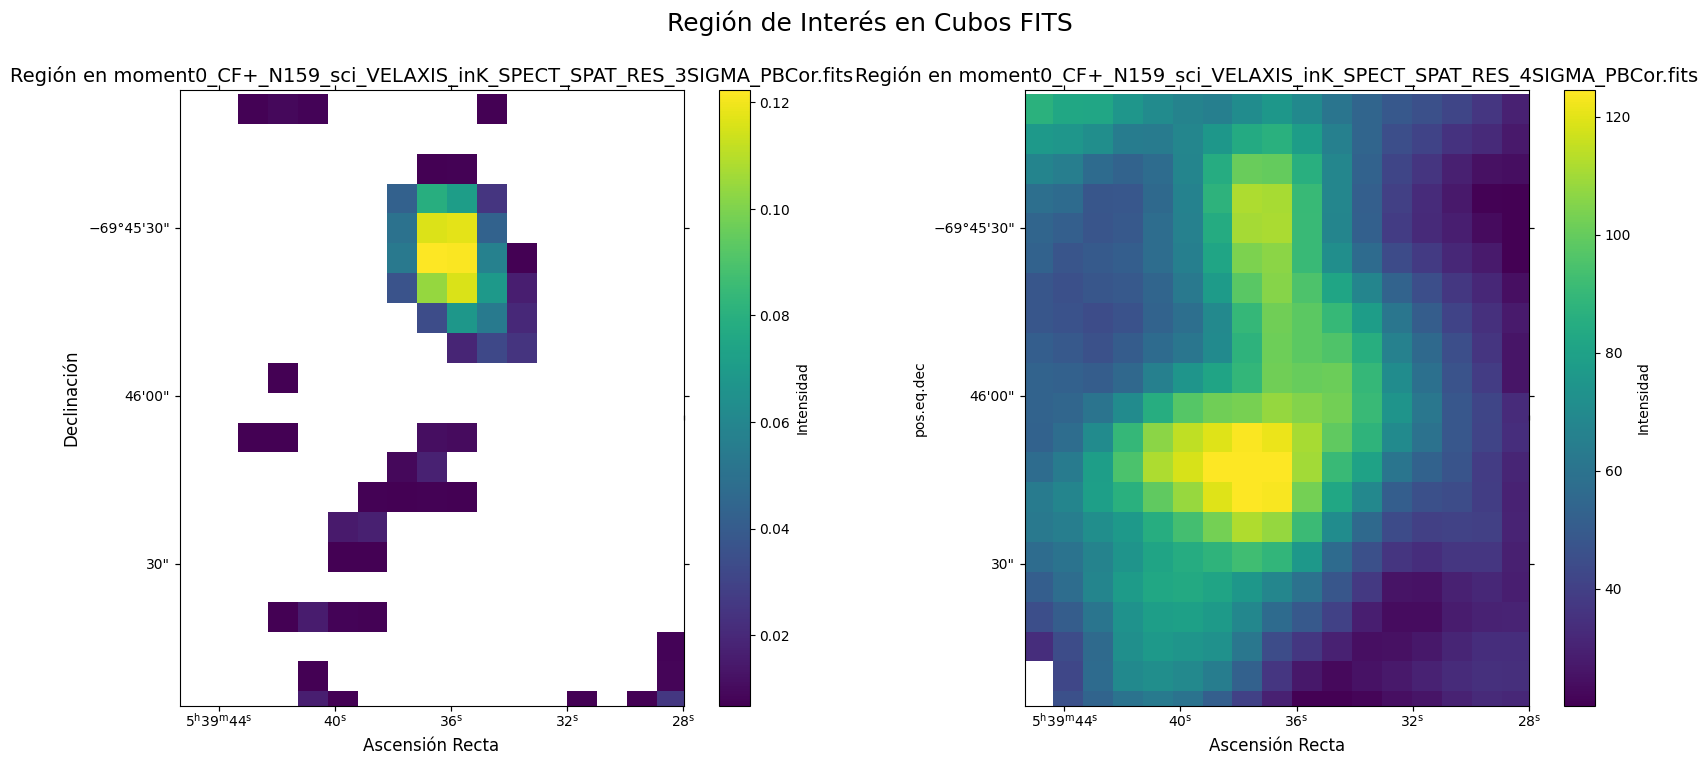

In [147]:
# Visualization of the masked regions on the FITS maps
plt.figure(figsize=(20, 8)) # Aumentamos el tamaño de la figura para dos subplots
plt.suptitle('Región de Interés en Cubos FITS', fontsize=18)

# Convert celestial coordinates to pixel coordinates for the region of interest

print('WCS1:', wcs1)
print('WCS2:', wcs2)

from astropy.wcs.utils import skycoord_to_pixel
center_x_pix, center_y_pix = skycoord_to_pixel(coord, wcs1, origin=0)

# Convert the width and height from arcsec to pixels
pixel_scale_x = abs(wcs1.pixel_scale_matrix[0, 0] * u.deg).to(u.arcsec)
pixel_scale_y = abs(wcs1.pixel_scale_matrix[1, 1] * u.deg).to(u.arcsec)
width_pix = width.to(u.arcsec).value / pixel_scale_x.value
height_pix = height.to(u.arcsec).value / pixel_scale_y.value

# Calculate the pixel limits for the zoom
xmin_pix = center_x_pix - width_pix / 2
xmax_pix = center_x_pix + width_pix / 2
ymin_pix = center_y_pix - height_pix / 2
ymax_pix = center_y_pix + height_pix / 2

# Create a custom legend
file1_name = file1.split('/')[-1]
file2_name = file2.split('/')[-1]

#----------------------------- Subplot para el Cubo 1
ax1 = plt.subplot(1, 2, 1, projection=wcs1)
im1 = ax1.imshow(data1, origin='lower', vmin=np.nanpercentile(data1, 1), vmax=np.nanpercentile(data1, 99))
ax1.set_title(f'Región en {file1_name}', fontsize=14)
ax1.set_xlabel('Ascensión Recta', fontsize=12)
ax1.set_ylabel('Declinación', fontsize=12)


ax1.set_xlim(xmin_pix, xmax_pix)  # Ajustar límites en x
ax1.set_ylim(ymin_pix, ymax_pix)  # Ajustar límites en y 

plt.colorbar(im1, ax=ax1, label='Intensidad') # Corregido: se pasa el objeto 'im1'

#---------------------------- Subplot para el Cubo 2
ax2 = plt.subplot(1, 2, 2, projection=wcs2)
im2 = ax2.imshow(data4, origin='lower', vmin=np.nanpercentile(data4, 1), vmax=np.nanpercentile(data4, 99))
ax2.set_title(f'Región en {file2_name}', fontsize=14)
ax2.set_xlabel('Ascensión Recta', fontsize=12)



ax2.set_xlim(xmin_pix, xmax_pix)  # Ajustar límites en x
ax2.set_ylim(ymin_pix, ymax_pix)  # Ajustar límites en y 
plt.colorbar(im2, ax=ax2, label='Intensidad') # Corregido: se pasa el objeto 'im2'

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta el layout para dar espacio al título principal
plt.show()

### ------------------------------- Generate the Scatter Plot -----------------------

Índice del punto destacado: 0
Pendiente (slope): 1.27910178031888 ± 0.5781816456017491
Intercepto (intercept): 1.8697663644453402 ± 0.027061542099449745
Valor R (r-value): 0.28349985573713904


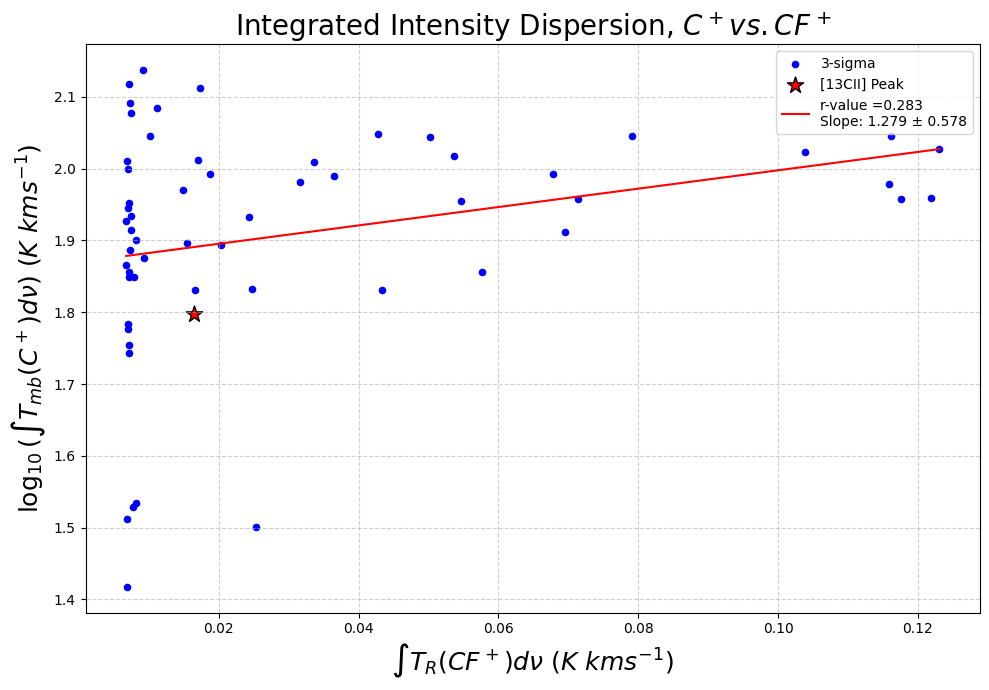

In [162]:
from scipy.stats import linregress

highlight_coord = SkyCoord('05h39m37.8s', '-69d46m09.9s', frame='icrs')
# Calcula la separación angular entre todas las posiciones y la que quieres destacar
sep = coord.separation(highlight_coord)

# Encuentra el índice del punto más cercano
idx_highlight = np.argmin(sep)
print("Índice del punto destacado:", idx_highlight)

# Create the scatterplot
plt.figure(figsize=(10, 7))
x = normalized_intensities1
y = np.log10(normalized_intensities4)

# Plot the 3-sigma points (as in original code, but vectorized instead of loop for efficiency)
plt.scatter(x, y, c='blue', s=20, label='3-sigma')

# Punto destacado (más grande y en color distinto)
plt.scatter(
    x[idx_highlight],
    y[idx_highlight],
    s=150,               # tamaño grande
    c='red',             # color llamativo
    edgecolors='black',
    linewidths=1.0,
    marker='*',          # forma de estrella
    label='[13CII] Peak' # etiqueta personalizada
)

# Optionally, add the other sigma levels to the same plot for comparison (uncomment if desired)
# plt.scatter(normalized_intensities2, normalized_intensities5, c='red', s=20, label='4-sigma')
# plt.scatter(normalized_intensities3, normalized_intensities6, c='green', s=20, label='5-sigma')

# Add labels and a title
plt.title(r'Integrated Intensity Dispersion, $C^+ vs. CF^+ $', fontsize=20)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Create a custom legend using mpatches for clarity, as scatter does not have a label parameter in this way
#file1_name = file1.split('/')[-1]
#file2_name = file2.split('/')[-1]
#legend_patch = mpatches.Patch(color='blue', label=f'positions in SOUTH {coord}')
#plt.legend(handles=[legend_patch], loc='best')

# Add linear fit to the plotted points (currently 3-sigma; adjust if adding others)
# If adding multiple scatters, you may want separate fits or a combined fit.


# Perform the linear regression
result = linregress(x, y)

# Obtain the error in the slope and intercept if needed
slope_err = result.stderr
intercept_err = result.intercept_stderr

# Print the values
print(f"Pendiente (slope): {result.slope} ± {slope_err}")
print(f"Intercepto (intercept): {result.intercept} ± {intercept_err}")
print(f"Valor R (r-value): {result.rvalue}")

# Plot the fitted line
x_line = np.linspace(min(x), max(x), 100)
y_line = result.slope * x_line + result.intercept
plt.plot(x_line, y_line, 'r-', label=f'r-value ={result.rvalue:.3f} \nSlope: {result.slope:.3f} ± {slope_err:.3f}')

# Show legend (including fit if desired)
plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()

Pendiente (slope): 1.023583024458411
Intercepto (intercept): 1.8972848224994365
Valor R (r-value): 0.26545670138112465


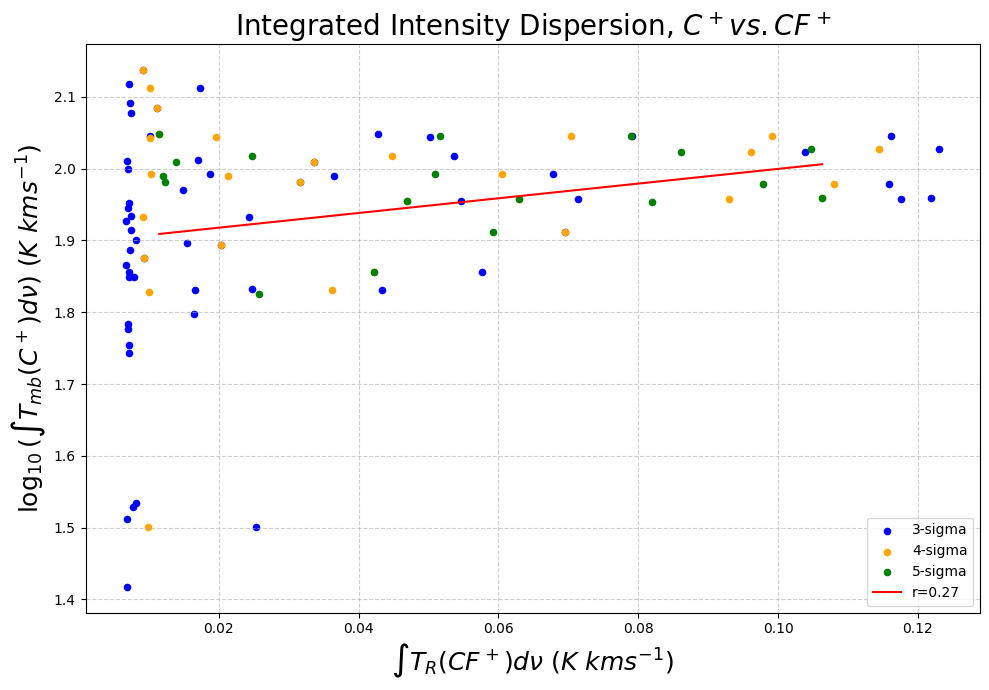

In [149]:
from scipy.stats import linregress

# Create the scatterplot
plt.figure(figsize=(10, 7))

# Plot the 3-sigma points (as in original code, but vectorized instead of loop for efficiency)
plt.scatter(normalized_intensities1, np.log10(normalized_intensities4), c='blue', s=20, label='3-sigma')
plt.scatter(normalized_intensities2, np.log10(normalized_intensities5), c='orange', s=20, label='4-sigma')
plt.scatter(normalized_intensities3, np.log10(normalized_intensities6), c='green', s=20, label='5-sigma')

# Add labels and a title
plt.title(r'Integrated Intensity Dispersion, $C^+ vs. CF^+ $', fontsize=20)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Create a custom legend using mpatches for clarity, as scatter does not have a label parameter in this way
#file1_name = file1.split('/')[-1]
#file2_name = file2.split('/')[-1]
#legend_patch = mpatches.Patch(color='blue', label=f'positions in SOUTH {coord}')
#plt.legend(handles=[legend_patch], loc='best')

# Add all point in 3sigma 4 sigma and 5sigma
x_all = np.concatenate([normalized_intensities1, normalized_intensities2, normalized_intensities3])
y_all = np.concatenate([np.log10(normalized_intensities4), np.log10(normalized_intensities5), np.log10(normalized_intensities6)])
result = linregress(x_all, y_all)

# Print the values
print(f"Pendiente (slope): {result.slope}")
print(f"Intercepto (intercept): {result.intercept}")
print(f"Valor R (r-value): {result.rvalue}")

# Plot the fitted line
x_line = np.linspace(min(x), max(x), 100)
y_line = result.slope * x_line + result.intercept
plt.plot(x_line, y_line, 'r-', label=f'r={result.rvalue:.2f}')

# Show legend (including fit if desired)
plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()

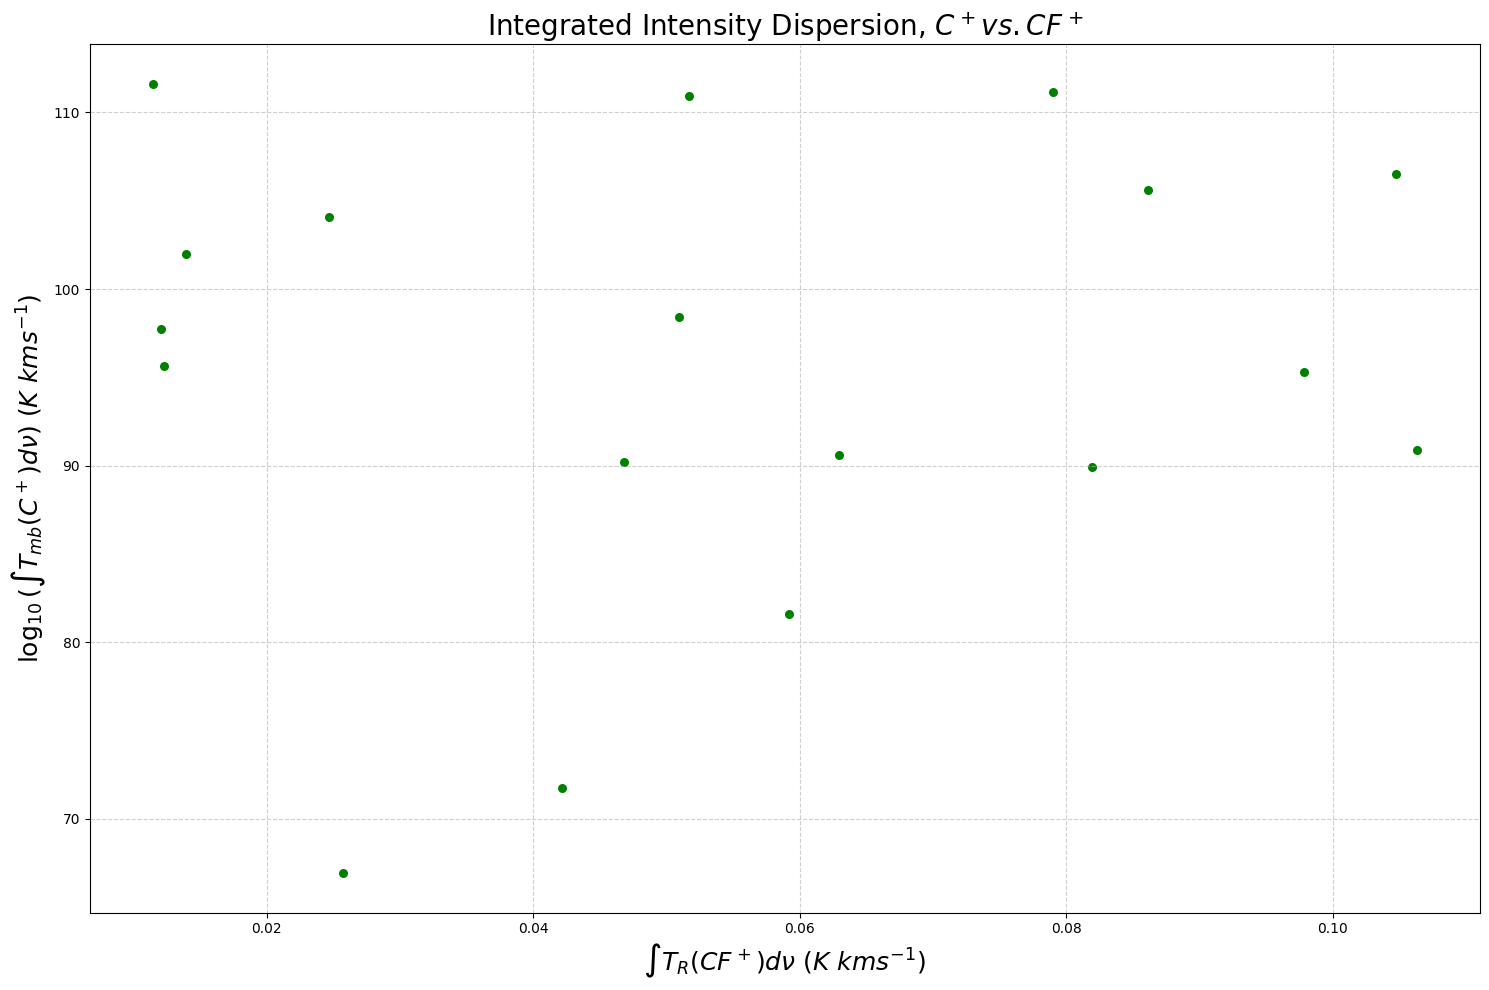

In [150]:
# Create the scatterplot
plt.figure(figsize=(15, 10))
# Loop through the filtered data and plot each point with a numerical label
# Cada punto representa una posición espacial, con un valor de intensidad
# del cubo 1 y otro del cubo 2. Los números permiten identificar la correspondencia.
for i in range(len(normalized_intensities3)):
    plt.scatter(normalized_intensities3[i], normalized_intensities6[i], c='green', s=30)
    #plt.scatter(normalized_intensities2[i], normalized_intensities5[i], c='red', s=20)
    #plt.scatter(normalized_intensities3[i], normalized_intensities6[i], c='green', s=20)
    #plt.text(normalized_intensities1[i], normalized_intensities2[i], f'{i+1}', fontsize=8, ha='center', va='bottom')

# Add labels and a title
plt.title(r'Integrated Intensity Dispersion, $C^+ vs. CF^+ $', fontsize=20)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Create a custom legend using mpatches for clarity, as scatter does not have a label parameter in this way
#file1_name = file1.split('/')[-1]
#file2_name = file2.split('/')[-1]
#legend_patch = mpatches.Patch(color='blue', label=f'positions in SOUTH {coord}')
#plt.legend(handles=[legend_patch], loc='best')

# Display the plot
plt.tight_layout()
plt.show()

=== AJUSTE LINEAL (x >= 0.01) ===
Pendiente (slope): 0.6506 ± 0.5446
Intercepto (intercept): 1.9210 ± 0.0341
R-valor (r-value): 0.2131
R-cuadrado: 0.0454
Nº puntos usados: 32


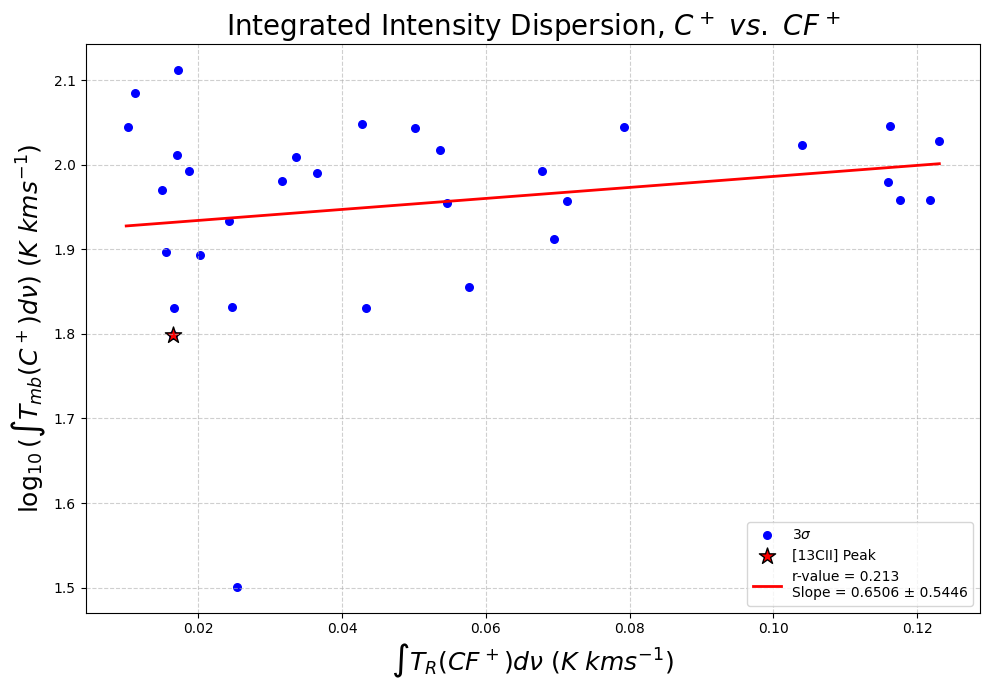

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.patches as mpatches

# --- Crear figura ---
plt.figure(figsize=(10, 7))

# --- Datos ---
x = normalized_intensities1  # CF+ (eje x)
y = np.log10(normalized_intensities4)  # C+ (eje y)

# --- Definir valor mínimo de x para el ajuste ---
x_min = 0.01

# --- Filtrar datos: solo puntos con x >= x_min ---
mask = x >= x_min
x_fit = x[mask]
y_fit = y[mask]


# --- Ajuste lineal SOLO en x >= 0.02 ---
# linregress devuelve: slope, intercept, r_value, p_value, std_err, intercept_stderr

result = linregress(x_fit, y_fit)
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
p_value = result.pvalue
slope_err = result.stderr          # Error estándar de la pendiente
intercept_err = result.intercept_stderr  # Error estándar del intercepto
r_squared = r_value**2

# --- Imprimir resultados ---
print(f'=== AJUSTE LINEAL (x >= {x_min}) ===')
print(f'Pendiente (slope): {slope:.4f} ± {slope_err:.4f}')
print(f'Intercepto (intercept): {intercept:.4f} ± {intercept_err:.4f}')
print(f'R-valor (r-value): {r_value:.4f}')
print(f'R-cuadrado: {r_squared:.4f}')
print(f'Nº puntos usados: {len(x_fit)}')

# --- Scatter: TODOS los puntos  ---
#for i in range(len(x)): # sin filtrar
for i in np.where(mask)[0]: # filtrados
    plt.scatter(x[i], y[i], c='blue', s=30, label=r'$3\sigma$' if i == np.where(mask)[0][0] else "")

# Punto destacado (más grande y en color distinto)
plt.scatter(
    x[idx_highlight],
    y[idx_highlight],
    s=150,               # tamaño grande
    c='red',             # color llamativo
    edgecolors='black',
    linewidths=1.0,
    marker='*',          # forma de estrella
    label='[13CII] Peak' # etiqueta personalizada
)

# --- Títulos y etiquetas ---
plt.title(r'Integrated Intensity Dispersion, $C^+ \ vs.\ CF^+$', fontsize=20)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Leyenda personalizada ---
file1_name = file3.split('/')[-1]
file2_name = file6.split('/')[-1]
legend_patch = mpatches.Patch(color='blue', label=f'Posiciones válidas en {file1_name} y {file2_name}')
plt.legend(handles=[legend_patch], loc='best')

# --- Línea de ajuste: SOLO desde x_min hasta max(x_fit) ---
x_line = np.linspace(x_min, np.max(x_fit), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linestyle='-', linewidth=2,
         label=f'r-value = {r_value:.3f}\nSlope = {slope:.4f} ± {slope_err:.4f}')

# --- Leyenda final ---
plt.legend(loc='best', fontsize=10)

# --- Mostrar gráfico ---
plt.tight_layout()
plt.show()

Pendiente (slope): 29.0365
Intercepto (intercept): 94.0373
R-valor (r-value): 0.0751
R-cuadrado: 0.0056


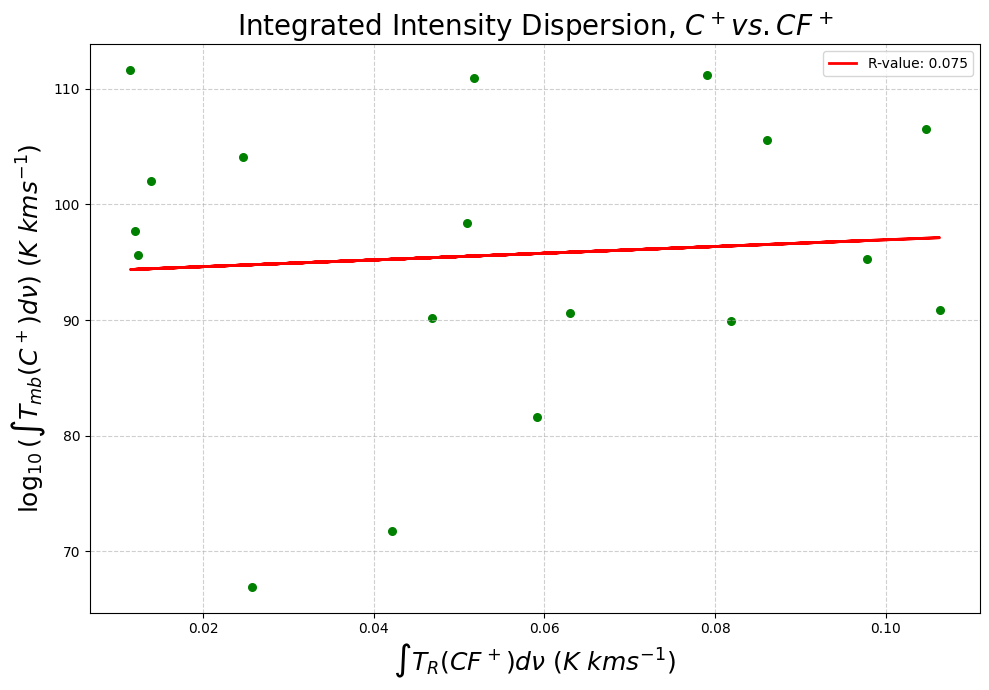

In [152]:
# Create the scatterplot with linear adjust 
plt.figure(figsize=(10, 7))

from scipy.stats import linregress

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(normalized_intensities3,normalized_intensities6) #cf+ datas, c+ datas
r_squared = r_value**2
print(f'Pendiente (slope): {slope:.4f}')
print(f'Intercepto (intercept): {intercept:.4f}')
print(f'R-valor (r-value): {r_value:.4f}')
print(f'R-cuadrado: {r_squared:.4f}')

# Loop through the filtered data and plot each point with a numerical label
# Cada punto representa una posición espacial, con un valor de intensidad
# del cubo 1 y otro del cubo 2. Los números permiten identificar la correspondencia.
for i in range(len(normalized_intensities3)):
    plt.scatter(normalized_intensities3[i], normalized_intensities6[i], c='green', s=30)
    #plt.text(normalized_intensities2[i], normalized_intensities5[i], f'{i+1}', fontsize=8, ha='center', va='bottom')

# Add labels and a title
plt.title(r'Integrated Intensity Dispersion, $C^+ vs. CF^+ $', fontsize=20)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Create a custom legend using mpatches for clarity, as scatter does not have a label parameter in this way
file1_name = file3.split('/')[-1]
file2_name = file6.split('/')[-1]
legend_patch = mpatches.Patch(color='blue', label=f'Posiciones válidas en {file1_name} y {file2_name}')
plt.legend(handles=[legend_patch], loc='best')

# Crear los valores y para la línea de ajuste
fit_line = slope * normalized_intensities3+ intercept
# Plotear la línea de ajuste
plt.plot(normalized_intensities3 ,fit_line, color='red', linestyle='-', linewidth=2, label= f'R-value: {r_value:.3f}')
         #  label=f'Ajuste lineal\nPendiente: {slope:.2f}\nIntercepto: {intercept:.2f}\nR-valor: {r_value:.2f}')

plt.legend(loc='best')
# Display the plot
plt.tight_layout()
plt.show()

Pendiente (slope): 29.0365
Intercepto (intercept): 94.0373
R-valor (r-value): 0.0751
R-cuadrado: 0.0056


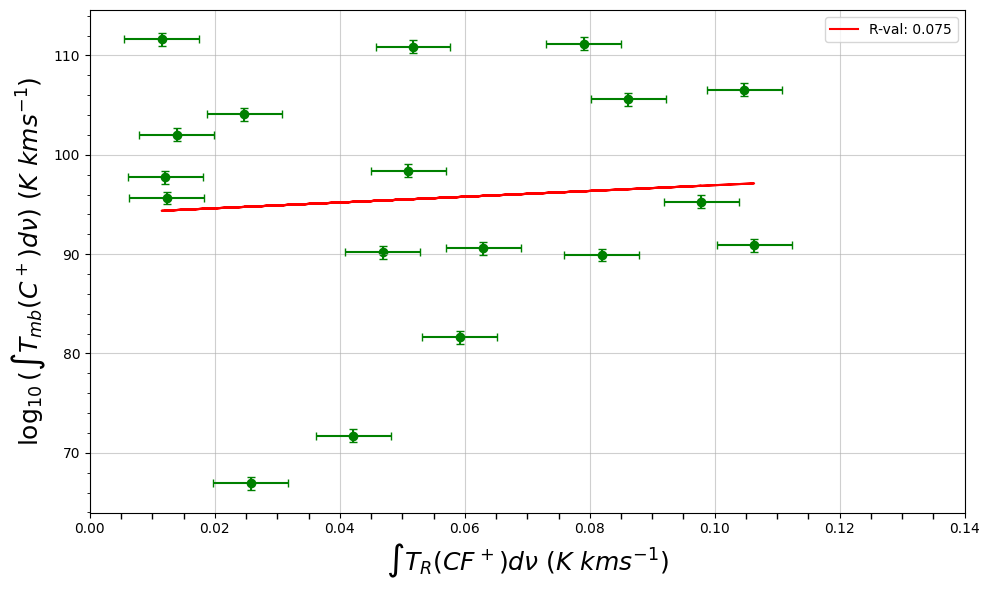

In [153]:
from scipy.stats import linregress
# --- INICIO DE LOS PLOTS ---
# Plot 1: Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(normalized_intensities3, normalized_intensities6, alpha=1, s=20, c='green', linewidth=2.5)

# Definir errores constantes 
y_err = 0.646  # Error horizontal ±0.646
x_err = 0.006  # Error vertical ±0.006

# Crear el scatter plot con error bars
plt.errorbar(normalized_intensities3, normalized_intensities6, xerr=x_err, yerr=y_err, 
             fmt='o', alpha=1, color='green', markersize=3, linewidth=1.5, capsize=3, 
             )

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(normalized_intensities3, normalized_intensities6)
r_squared = r_value**2
print(f'Pendiente (slope): {slope:.4f}')
print(f'Intercepto (intercept): {intercept:.4f}')
print(f'R-valor (r-value): {r_value:.4f}')
print(f'R-cuadrado: {r_squared:.4f}')

# Crear los valores y para la línea de ajuste
fit_line = slope * normalized_intensities3 + intercept

# Plotear la línea de ajuste
plt.plot(normalized_intensities3, fit_line, color='red', linestyle='-', linewidth=1.5, 
         label=f'R-val: {r_value:.3f}')

# Add labels and a title
#plt.title(r'Integrated Intensity Dispersion, $C^+ vs. CF^+ $ ', fontsize=20)
plt.xlim(0.0, 0.14)
plt.xlabel(name1, fontsize=18)
plt.ylabel(name2, fontsize=18)
plt.grid(True, linestyle='-', alpha=0.6)

# Añadir ticks principales y subticks
#plt.xticks(range(0.0, 0.145, 0.005))  # Ticks principales cada 5 unidades
plt.minorticks_on()  # Habilitar subticks
plt.tick_params(axis='x', which='minor', length=4, width=1, labelsize=5)  # Personalizar subticks
plt.tick_params(axis='x', which='major', labelsize=10)  # Ajustar tamaño de etiquetas principales

plt.legend(loc='best')
plt.tight_layout()
plt.show()